In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import math

In [3]:
# Creating train and test dataset
#url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
#data = pd.read_csv(url,sep=",")

In [4]:
#total_size=len(data)
#train_size=math.floor(0.77*total_size)

In [5]:
#train=data.head(train_size)
#test=data.tail(len(data) -train_size)

In [6]:
#train.to_csv('train.csv')
#test.to_csv('test.csv')

In [7]:
train_data=pd.read_csv("./Train_Test_Dataset/train.csv")
test_data=pd.read_csv("./Train_Test_Dataset/test.csv")

In [8]:
train_data["Date"]=pd.to_datetime(train_data["Date"])

In [9]:
train_data

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN
...,...,...,...,...,...,...
3369,3369,2015-03-24,1518.172,23.568,117.004,140.572
3370,3370,2015-03-25,1508.028,142.024,116.248,258.272
3371,3371,2015-03-26,1521.241,120.271,38.513,158.784
3372,3372,2015-03-27,1499.701,219.296,76.244,295.540


In [10]:
train_data.dtypes

Unnamed: 0              int64
Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [11]:
train_data.isnull().sum()

Unnamed: 0        0
Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [12]:
Consumption_data=train_data["Consumption"]

In [13]:
# ADF Test
result = adfuller(Consumption_data, autolag='AIC')
#Extracting the values from the results:

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -5.492527
p-value: 0.000002
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


In [14]:
#train_data=train_data.ffill(axis = 1)

In [15]:
train_data.isnull().sum()

Unnamed: 0        0
Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [16]:
train_data

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN
...,...,...,...,...,...,...
3369,3369,2015-03-24,1518.172,23.568,117.004,140.572
3370,3370,2015-03-25,1508.028,142.024,116.248,258.272
3371,3371,2015-03-26,1521.241,120.271,38.513,158.784
3372,3372,2015-03-27,1499.701,219.296,76.244,295.540


In [17]:
train_data.keys()

Index(['Unnamed: 0', 'Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [18]:
# Plot train data
train_data.keys()

Index(['Unnamed: 0', 'Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

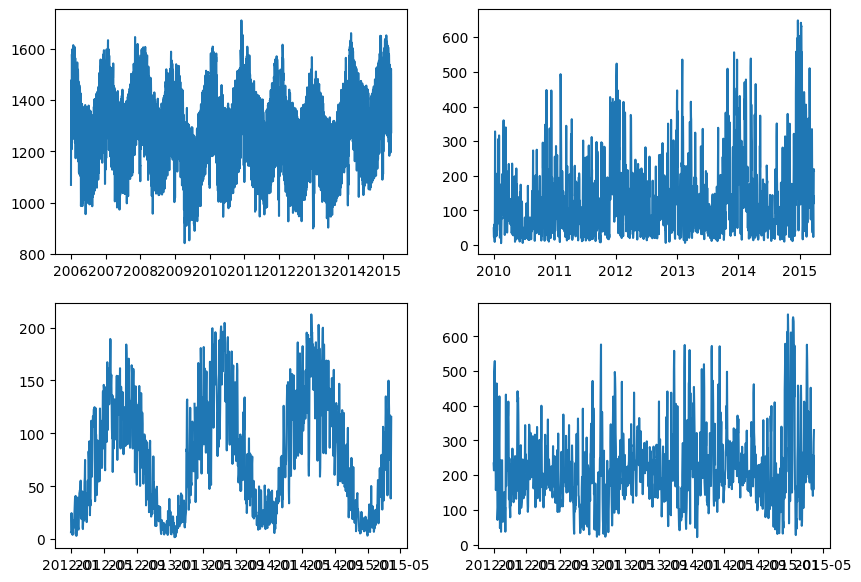

In [19]:

fig, ax = plt.subplots(2, 2, figsize=(10,7))
ax[0,0].plot(train_data["Date"],train_data["Consumption"],label="Consumption")
ax[0,1].plot(train_data["Date"],train_data["Wind"],label="Wind")
ax[1,0].plot(train_data["Date"],train_data["Solar"],label="Solar")
ax[1,1].plot(train_data["Date"],train_data["Wind+Solar"],label="Wind+Solar")

In [20]:
#train_data=pd.read_csv("./MULTI_VARIABLE/train.csv")

In [21]:
train_data=train_data.ffill(axis = 1)

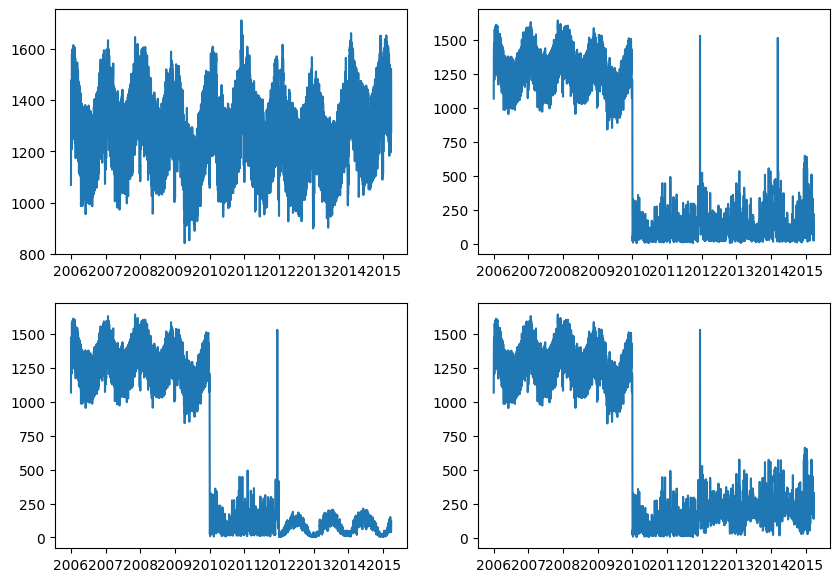

In [22]:

fig, ax = plt.subplots(2, 2, figsize=(10,7))
ax[0,0].plot(train_data["Date"],train_data["Consumption"],label="Consumption")
ax[0,1].plot(train_data["Date"],train_data["Wind"],label="Wind")
ax[1,0].plot(train_data["Date"],train_data["Solar"],label="Solar")
ax[1,1].plot(train_data["Date"],train_data["Wind+Solar"],label="Wind+Solar")

In [23]:
df1_train=train_data.rename(columns={"Consumption":"y","Date":"ds"})
df1_train.tail()

,Unnamed: 0,ds,y,Wind,Solar,Wind+Solar
3369,3369,2015-03-24,1518.172,23.568,117.004,140.572
3370,3370,2015-03-25,1508.028,142.024,116.248,258.272
3371,3371,2015-03-26,1521.241,120.271,38.513,158.784
3372,3372,2015-03-27,1499.701,219.296,76.244,295.54
3373,3373,2015-03-28,1274.136,214.583,115.42,330.003


In [24]:
#train_data=train_data.drop(['Unnamed: 0'], axis=1)

In [25]:
#train_data

# MODEL

In [26]:
model=Prophet()
model.add_regressor("Wind",standardize=False)
model.add_regressor("Solar")
model.add_regressor("Wind+Solar")
model.fit(df1_train)

09:58:38 - cmdstanpy - INFO - Chain [1] start processing
09:58:39 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
#model.params

In [105]:
#understanding the model fit--------------------------------------------
df1_train_2 =df1_train[["ds","Wind","Solar","Wind+Solar"]] #we will be predicting 'y' i.e."Consumption"
forecast1_train = model.predict(df1_train_2)
forecast1_train = forecast1_train[['ds','yhat']]

In [106]:
forecast1_train

,ds,yhat
0,2006-01-01,1041.820104
1,2006-01-02,1337.411865
2,2006-01-03,1383.512324
3,2006-01-04,1398.808190
4,2006-01-05,1400.146171
...,...,...
3369,2015-03-24,1486.572553
3370,2015-03-25,1482.239164
3371,2015-03-26,1488.963165
3372,2015-03-27,1445.442552


# Actual and Predicted Consumption

In [107]:
Com_y_y_hat=pd.DataFrame([forecast1_train['ds'],df1_train['y'],forecast1_train['yhat']])
Com_y_y_hat

,0,1,2,3,4,5,6,7,8,9,...,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373
ds,1.136074e+18,1.136160e+18,1.136246e+18,1.136333e+18,1.136419e+18,1.136506e+18,1.136592e+18,1.136678e+18,1.136765e+18,1.136851e+18,...,1.426723e+18,1.426810e+18,1.426896e+18,1.426982e+18,1.427069e+18,1.427155e+18,1.427242e+18,1.427328e+18,1.427414e+18,1.427501e+18
y,1.069184e+03,1.380521e+03,1.442533e+03,1.457217e+03,1.477131e+03,1.403427e+03,1.300287e+03,1.207985e+03,1.529323e+03,1.576911e+03,...,1.508011e+03,1.490008e+03,1.304469e+03,1.196051e+03,1.500293e+03,1.518172e+03,1.508028e+03,1.521241e+03,1.499701e+03,1.274136e+03
yhat,1.041820e+03,1.337412e+03,1.383512e+03,1.398808e+03,1.400146e+03,1.389689e+03,1.209526e+03,1.125484e+03,1.428239e+03,1.480666e+03,...,1.484728e+03,1.458801e+03,1.262316e+03,1.156570e+03,1.449093e+03,1.486573e+03,1.482239e+03,1.488963e+03,1.445443e+03,1.235773e+03


Plot

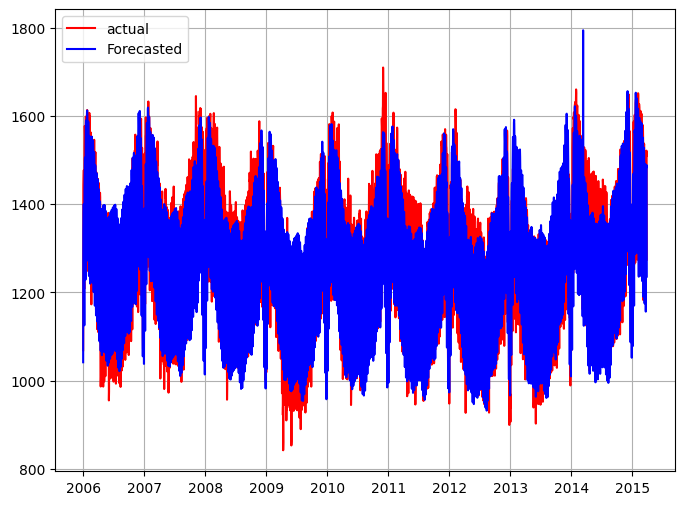

In [64]:
plt.figure(figsize=(8,6))
plt.plot(forecast1_train['ds'],df1_train['y'],color='red',label='actual')
plt.plot(forecast1_train['ds'],forecast1_train['yhat'],color='blue',label='Forecasted')
plt.legend()
plt.grid(True)

# TEST

In [92]:
test_data=pd.read_csv("./MULTI_VARIABLE/test.csv")
test_data.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,3374,2015-03-29,1187.673,521.684,37.867,559.551
1,3375,2015-03-30,1500.454,610.862,90.403,701.265
2,3376,2015-03-31,1517.419,624.674,69.416,694.090
3,3377,2015-04-01,1531.944,571.057,98.710,669.767
4,3378,2015-04-02,1506.147,418.505,81.690,500.195


In [93]:
test_data["Date"]=pd.to_datetime(test_data["Date"])

In [94]:
test_data

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,3374,2015-03-29,1187.67300,521.684,37.867,559.551
1,3375,2015-03-30,1500.45400,610.862,90.403,701.265
2,3376,2015-03-31,1517.41900,624.674,69.416,694.090
3,3377,2015-04-01,1531.94400,571.057,98.710,669.767
4,3378,2015-04-02,1506.14700,418.505,81.690,500.195
...,...,...,...,...,...,...
1004,4378,2017-12-27,1263.94091,394.507,16.530,411.037
1005,4379,2017-12-28,1299.86398,506.424,14.162,520.586
1006,4380,2017-12-29,1295.08753,584.277,29.854,614.131
1007,4381,2017-12-30,1215.44897,721.247,7.467,728.714


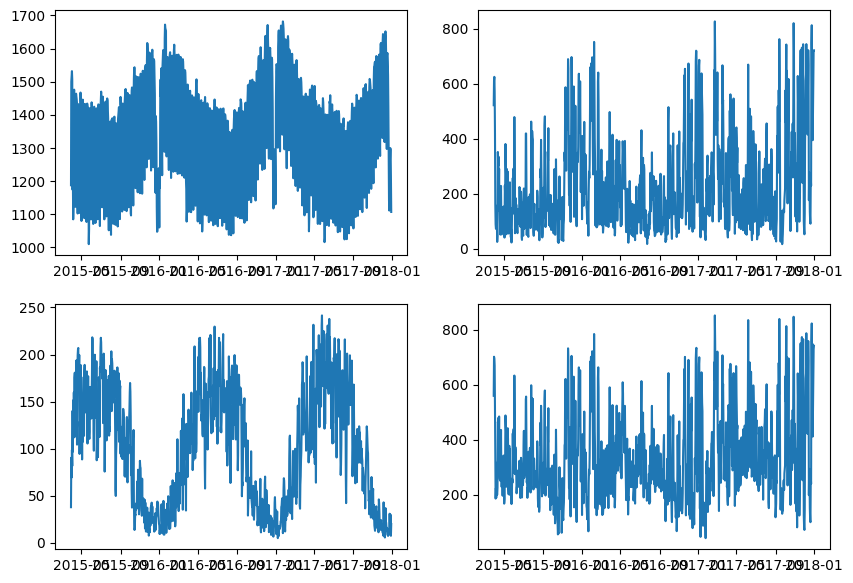

In [95]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
ax[0,0].plot(test_data["Date"],test_data["Consumption"],label="Consumption")
ax[0,1].plot(test_data["Date"],test_data["Wind"],label="Wind")
ax[1,0].plot(test_data["Date"],test_data["Solar"],label="Solar")
ax[1,1].plot(test_data["Date"],test_data["Wind+Solar"],label="Wind+Solar")

In [112]:
test_data=test_data.ffill(axis = 1)

In [113]:
df1_test=test_data.rename(columns={"Consumption":"y","Date":"ds"})
df1_test.head()

,Unnamed: 0,ds,y,Wind,Solar,Wind+Solar
0,3374,2015-03-29,1187.673,521.684,37.867,559.551
1,3375,2015-03-30,1500.454,610.862,90.403,701.265
2,3376,2015-03-31,1517.419,624.674,69.416,694.09
3,3377,2015-04-01,1531.944,571.057,98.71,669.767
4,3378,2015-04-02,1506.147,418.505,81.69,500.195


In [115]:
df1_test_2 =df1_test[["ds","Wind","Solar","Wind+Solar"]]
forecast1_test=model.predict(df1_test_2)
forecast1_test = forecast1_test[['ds','yhat']]

In [116]:
df1_test_2

,ds,Wind,Solar,Wind+Solar
0,2015-03-29,521.684,37.867,559.551
1,2015-03-30,610.862,90.403,701.265
2,2015-03-31,624.674,69.416,694.09
3,2015-04-01,571.057,98.71,669.767
4,2015-04-02,418.505,81.69,500.195
...,...,...,...,...
1004,2017-12-27,394.507,16.53,411.037
1005,2017-12-28,506.424,14.162,520.586
1006,2017-12-29,584.277,29.854,614.131
1007,2017-12-30,721.247,7.467,728.714


In [117]:
forecast1_test

,ds,yhat
0,2015-03-29,1132.149461
1,2015-03-30,1409.279653
2,2015-03-31,1448.749769
3,2015-04-01,1445.949181
4,2015-04-02,1444.388700
...,...,...
1004,2017-12-27,1488.588418
1005,2017-12-28,1470.153561
1006,2017-12-29,1435.564067
1007,2017-12-30,1237.348310


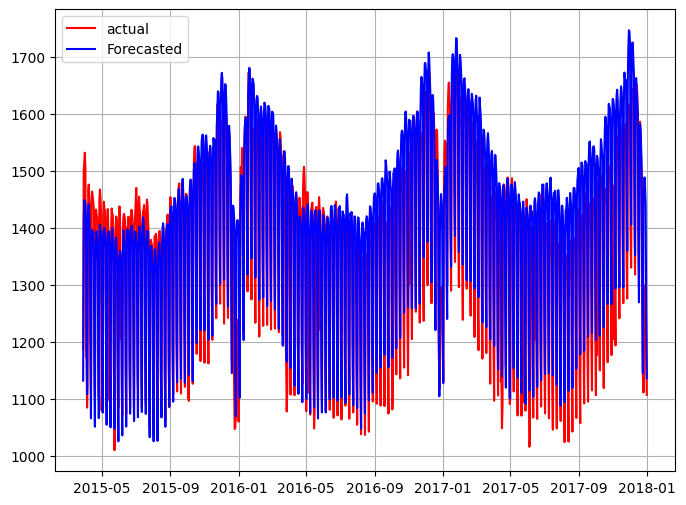

In [118]:
plt.figure(figsize=(8,6))
plt.plot(forecast1_test['ds'],df1_test['y'],color='red',label='actual')
plt.plot(forecast1_test['ds'],forecast1_test['yhat'],color='blue',label='Forecasted')
plt.legend()
plt.grid(True)

In [ ]:
# Now find the consumption beyomd 10 years

In [187]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

In [188]:
data = pd.read_csv(url,sep=",")

In [189]:
display(data.tail())

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [190]:
data=data.ffill(axis = 1)

In [191]:
data=data.rename(columns={"Consumption":"y","Date":"ds"})
data.tail()

,ds,y,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.53,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.98,741.156


In [197]:
forecast_data = data[['ds','y']]
forecast_data

,ds,y
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131
...,...,...
4378,2017-12-27,1263.94091
4379,2017-12-28,1299.86398
4380,2017-12-29,1295.08753
4381,2017-12-30,1215.44897


In [198]:
# fit a default parameter model to the data
model_full = Prophet()
model_full.fit(forecast_data) 

23:08:55 - cmdstanpy - INFO - Chain [1] start processing
23:08:58 - cmdstanpy - INFO - Chain [1] done processing


In [199]:
future = model_full.make_future_dataframe(periods=3, freq='Y')

In [200]:
forecast = model_full.predict(future)

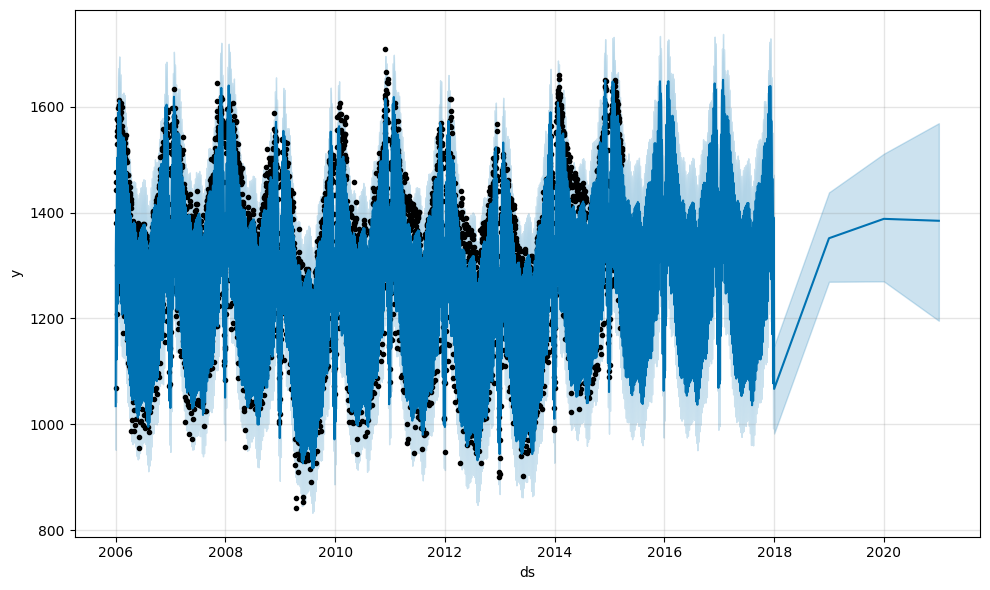

In [201]:
model.plot(forecast)
plt.show() 

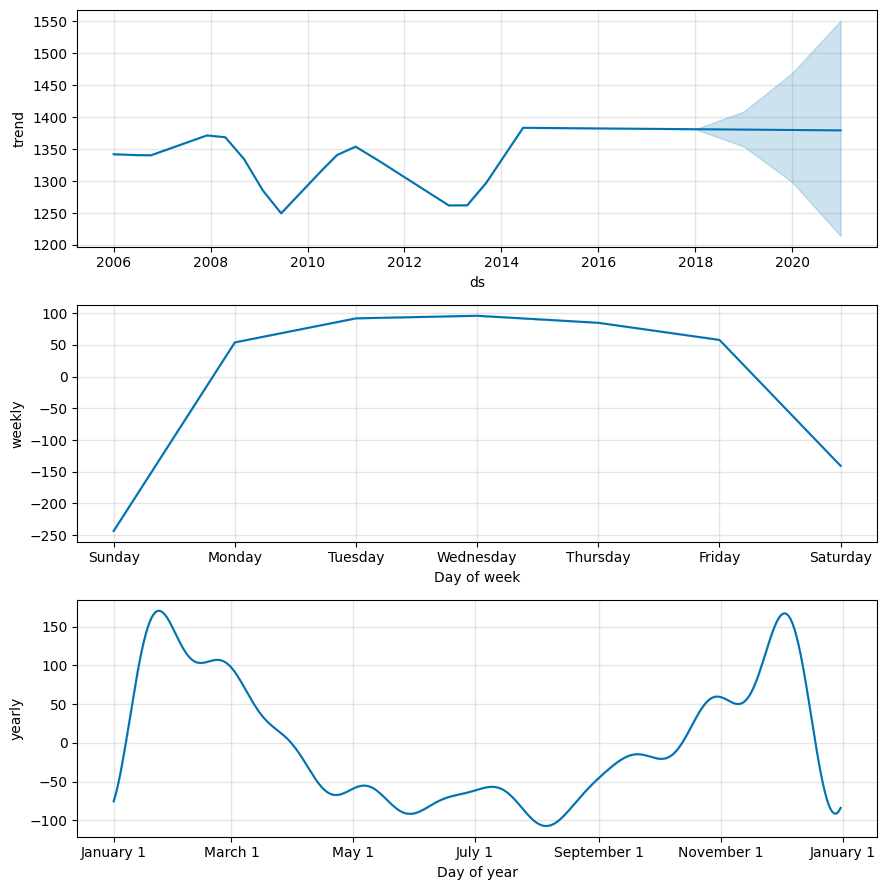

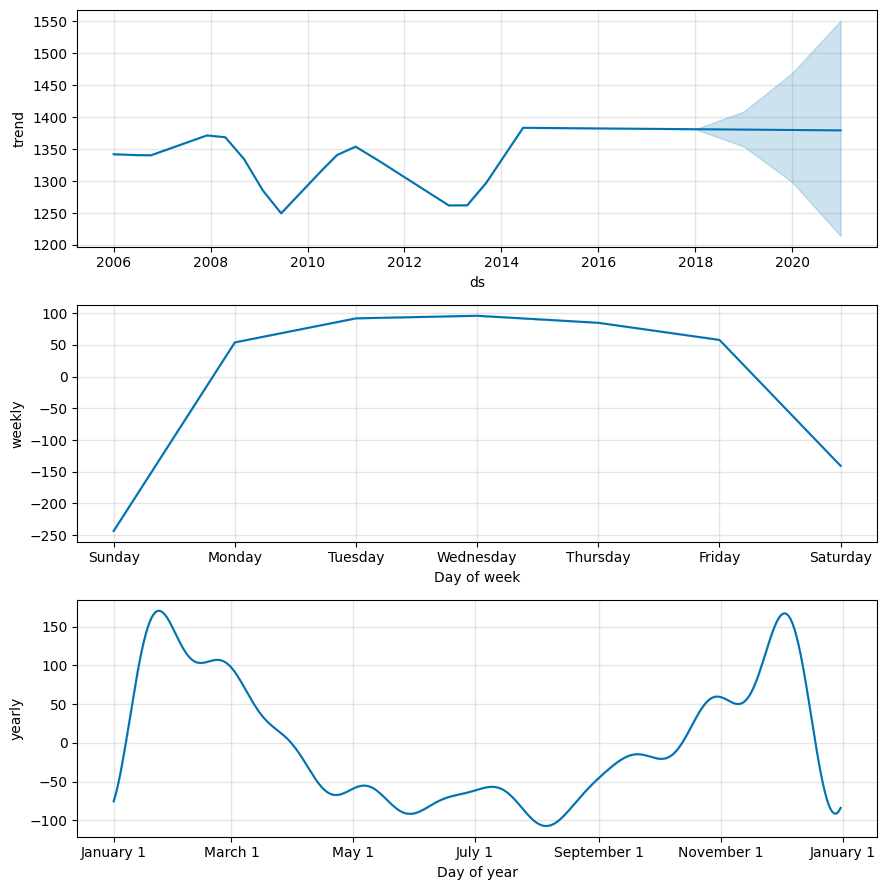

In [202]:
model.plot_components(forecast) 